<a href="https://colab.research.google.com/github/May-Moon-Colab/Business-Analytics/blob/main/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CASE STUDY: Wikipedia (Briefing)
Description: A Dataset with daily Udemy Wikipedia Visits (using Facebook Prophet technique)
   1. Predict the number of visits to the wikipedia page of Udemy
   2. Learn cross-validation
   3. Combine with Parameter Tuning


In [4]:
#Directory, Libraries  and data

In [5]:
%cd /content/drive/MyDrive/Business Analyst course/Predictive Analytics/Prophet

/content/drive/MyDrive/Business Analyst course/Predictive Analytics/Prophet


In [6]:
#Import Libraries
import numpy as np
import pandas as pd
from prophet import Prophet

In [7]:
#Data
df = pd.read_csv("Udemy_wikipedia_visits.csv")
df.head()

,Date,Udemy,Easter,Christmas,Black Friday
0,1/1/2016,311,0,0,0
1,1/2/2016,564,0,0,0
2,1/3/2016,517,0,0,0
3,1/4/2016,652,0,0,0
4,1/5/2016,756,0,0,0


In [8]:
#Looking into what kind of variables we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1827 non-null   object
 1   Udemy         1827 non-null   int64 
 2   Easter        1827 non-null   int64 
 3   Christmas     1827 non-null   int64 
 4   Black Friday  1827 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.5+ KB


In [9]:
#Summary statistics
df.describe()

,Udemy,Easter,Christmas,Black Friday
count,1827.000000,1827.000000,1827.000000,1827.000000
mean,943.068418,0.002737,0.002737,0.002737
std,531.341700,0.052256,0.052256,0.052256
min,209.000000,0.000000,0.000000,0.000000
25%,542.500000,0.000000,0.000000,0.000000
50%,832.000000,0.000000,0.000000,0.000000
75%,1175.000000,0.000000,0.000000,0.000000
max,2847.000000,1.000000,1.000000,1.000000


<Axes: >

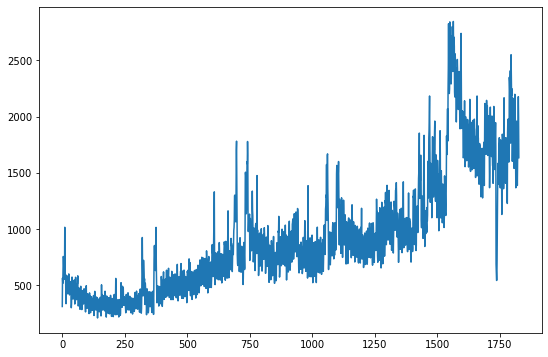

In [10]:
#Plotting
df.Udemy.plot(figsize = (9,6))

#Data Preparation

In [11]:
#data variable: %m/%d/%Y  ->  %Y-%m-%d
df.Date = pd.to_datetime(df.Date,format = "%m/%d/%Y")

In [12]:
df.Date

0      2016-01-01
1      2016-01-02
2      2016-01-03
3      2016-01-04
4      2016-01-05
          ...    
1822   2020-12-27
1823   2020-12-28
1824   2020-12-29
1825   2020-12-30
1826   2020-12-31
Name: Date, Length: 1827, dtype: datetime64[ns]

In [13]:
#Change variable: Date -> ds, time-series (Udemy) -> y
df = df.rename(columns = {'Date': 'ds',
                          'Udemy': 'y'})
df.head(1)

,ds,y,Easter,Christmas,Black Friday
0,2016-01-01,311,0,0,0


#Holidays

In [14]:
#Easter
easter_dates = df[df.Easter == 1].ds
easter = pd.DataFrame({'holiday': 'easter',
                       'ds':easter_dates,
                       'lower_window':-5,
                       'upper_window': 2})
easter

,holiday,ds,lower_window,upper_window
86,easter,2016-03-27,-5,2
471,easter,2017-04-16,-5,2
821,easter,2018-04-01,-5,2
1206,easter,2019-04-21,-5,2
1563,easter,2020-04-12,-5,2


In [15]:
#Black Friday
bf_dates = pd.to_datetime(df[df['Black Friday'] == 1].ds)
bf = pd.DataFrame({'holiday': 'black_friday',
                   'ds': bf_dates,
                   'lower_window':-7,
                   'upper_window': 5})

In [16]:
#Combine the holidays
holidays = pd.concat([easter, bf])
holidays

,holiday,ds,lower_window,upper_window
86,easter,2016-03-27,-5,2
471,easter,2017-04-16,-5,2
821,easter,2018-04-01,-5,2
1206,easter,2019-04-21,-5,2
1563,easter,2020-04-12,-5,2
329,black_friday,2016-11-25,-7,5
693,black_friday,2017-11-24,-7,5
1057,black_friday,2018-11-23,-7,5
1428,black_friday,2019-11-29,-7,5
1792,black_friday,2020-11-27,-7,5


In [17]:
#Remove holidays from the main dataframe
df = df.drop(columns = ["Easter", "Black Friday"])
df.head()

,ds,y,Christmas
0,2016-01-01,311,0
1,2016-01-02,564,0
2,2016-01-03,517,0
3,2016-01-04,652,0
4,2016-01-05,756,0


#Prophet Model

In [18]:
#TRaining and test split
test_days = 31
training = df.iloc[:-test_days,:]
test = df.iloc[-test_days:, :]
print( test.head(1))
print(training.tail(1))

             ds     y  Christmas
1796 2020-12-01  2393          0
             ds     y  Christmas
1795 2020-11-30  2551          0


In [19]:
#Prophet Model
m = Prophet(growth = 'linear',
            yearly_seasonality= True,
            weekly_seasonality= True,
            daily_seasonality= False,
            holidays = holidays,
            seasonality_mode = 'additive',
            seasonality_prior_scale= 10,
            holidays_prior_scale= 10,
            changepoint_prior_scale= 0.05)
m.add_regressor('Christmas', mode='multiplicative')
#m.add_regressor('xxxx')
m.fit(training)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpkgvs8ono/llgejgrv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkgvs8ono/1ymqag0k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97691', 'data', 'file=/tmp/tmpkgvs8ono/llgejgrv.json', 'init=/tmp/tmpkgvs8ono/1ymqag0k.json', 'output', 'file=/tmp/tmpkgvs8ono/prophet_modeljt91t5vn/prophet_model-20230322011102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:11:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:11:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [20]:
#Regressor coefficients
from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,Christmas,multiplicative,0.0,-0.324999,-0.324999,-0.324999


#Forecasting

In [21]:
#create future dataframe
future = m.make_future_dataframe(periods = test_days,
                                 freq = 'D')
future = pd.concat([future, df.iloc[:, 2:]],
                   axis = 1)
future

,ds,Christmas
0,2016-01-01,0
1,2016-01-02,0
2,2016-01-03,0
3,2016-01-04,0
4,2016-01-05,0
...,...,...
1822,2020-12-27,0
1823,2020-12-28,0
1824,2020-12-29,0
1825,2020-12-30,0


In [22]:
#forecasting
forecast = m.predict(future)
forecast.head()
print(forecast.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Christmas', 'Christmas_lower', 'Christmas_upper', 'additive_terms',
       'additive_terms_lower', 'additive_terms_upper', 'black_friday',
       'black_friday_lower', 'black_friday_upper', 'easter', 'easter_lower',
       'easter_upper', 'extra_regressors_multiplicative',
       'extra_regressors_multiplicative_lower',
       'extra_regressors_multiplicative_upper', 'holidays', 'holidays_lower',
       'holidays_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'weekly', 'weekly_lower', 'weekly_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'yhat'],
      dtype='object')


In [23]:
#Holiday assessment
holiday = 'black_friday'
forecast[(forecast[holiday].abs()> 0) & (forecast['ds'] > '2020-01-01')][['ds', holiday]]

,ds,black_friday
1785,2020-11-20,99.296527
1786,2020-11-21,90.540009
1787,2020-11-22,163.347479
1788,2020-11-23,235.617435
1789,2020-11-24,212.007264
1790,2020-11-25,184.124600
1791,2020-11-26,223.389001
1792,2020-11-27,447.508542
1793,2020-11-28,204.173744
1794,2020-11-29,228.853817


In [24]:
#retrieve the predictins
predictions = forecast.yhat[-test_days:]

In [25]:
#Accuracy assessment
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(test.y, predictions))
print(np.sqrt(mean_squared_error(test.y, predictions)))

184.5327309354843
236.18722269520234


#Visualization

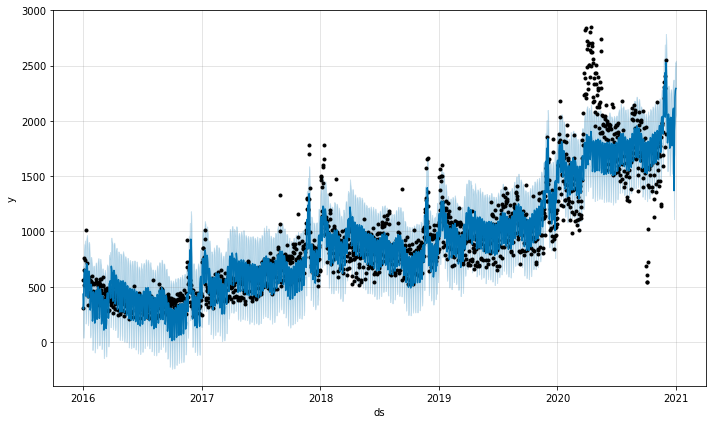

In [34]:
#Visualiza the forecast
m.plot(forecast);

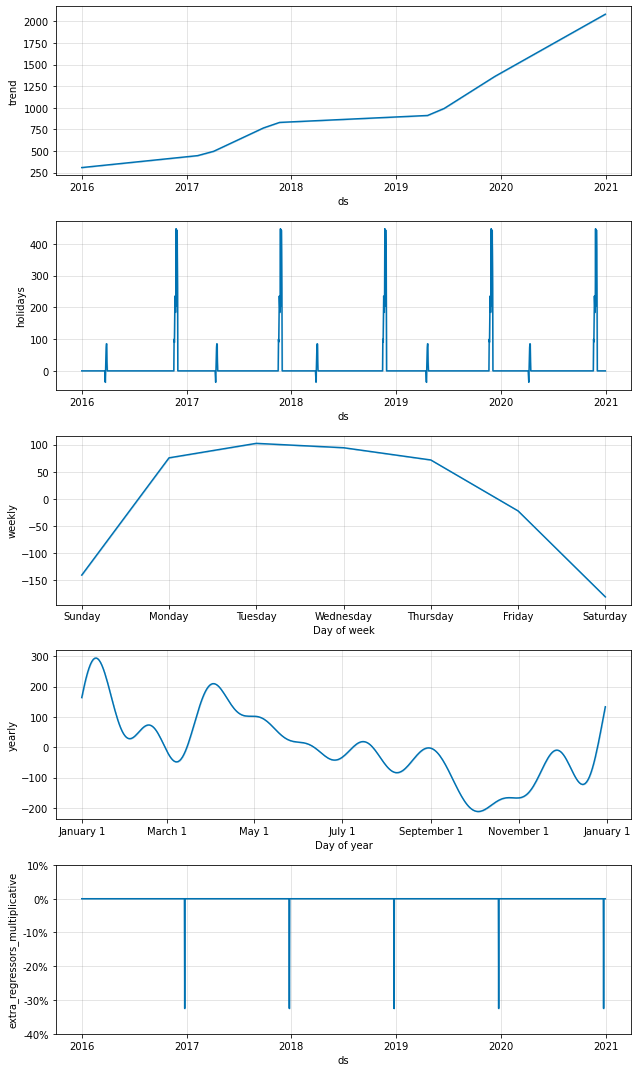

In [27]:
#plot components -> Structural Time Series decomposition
m.plot_components(forecast);

#Cross Validation

In [ ]:
#CV
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m,
                 horizon = '31 days',
                 initial= '1450 days',
                 parallel = 'processes')


In [29]:
#out put of th CV
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-12-26,1283.904639,1152.349300,1416.258550,1165,2019-12-25
1,2019-12-27,1225.347896,1094.496399,1361.472169,1111,2019-12-25
2,2019-12-28,1104.061400,975.241289,1228.857556,1038,2019-12-25
3,2019-12-29,1165.969900,1030.535822,1304.040261,971,2019-12-25
4,2019-12-30,1374.564180,1239.954845,1511.060312,1192,2019-12-25


In [30]:
#Error assessment

print(mean_absolute_error(df_cv['y'], df_cv['yhat']))
print(np.sqrt(mean_squared_error(df_cv['y'], df_cv['yhat'])))

397.58625790524655
515.3769002846452


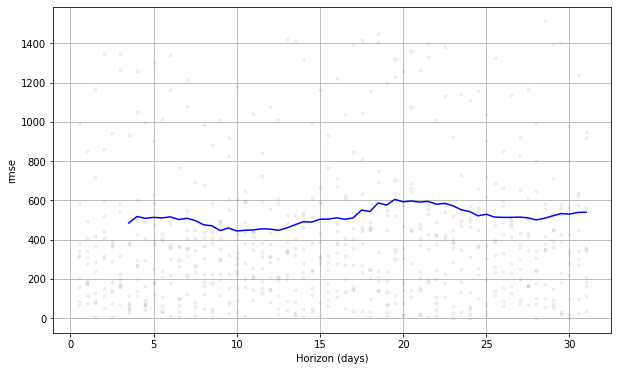

In [31]:
#CV Visualization
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv,
                             metric = 'rmse');

#Parameter Tuning

In [32]:
#parameter Grid
from sklearn.model_selection import ParameterGrid
param_grid = {'seasonality_mode': ['additive', 'multiplicative'],
              'seasonality_prior_scale': [5, 10, 20],
              'holidays_prior_scale': [5, 10, 20],
              'changepoint_prior_scale': [0.01, 0.05, 0.1]}
grid = ParameterGrid(param_grid)
len(list(grid))

54

In [33]:
#Empty list to store results
rmse =[]
#start the loop
for params in grid:
  #build the model
  m = Prophet (growth = 'linear',
            yearly_seasonality= True,
            weekly_seasonality= True,
            daily_seasonality= False,
            holidays = holidays,
            seasonality_mode = params['seasonality_mode'],
            seasonality_prior_scale= params['seasonality_prior_scale'],
            holidays_prior_scale= params['holidays_prior_scale'],
            changepoint_prior_scale= params['changepoint_prior_scale'])
  m.add_regressor('Christmas', mode='multiplicative')
  m.fit(training)
  
  #Cross-Validation
  df_cv = cross_validation(m,
                           horizon = '31 days',
                           initial= '1450 days',
                           parallel = 'processes')

  #Measure and store results
  error = np.sqrt(mean_squared_error(df_cv['y'], df_cv['yhat']))
  rmse.append(error)

Streaming output truncated to the last 5000 lines.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkgvs8ono/_rk4vifx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkgvs8ono/iqqkbg1x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=607', 'data', 'file=/tmp/tmpkgvs8ono/_rk4vifx.json', 'init=/tmp/tmpkgvs8ono/iqqkbg1x.json', 'output', 'file=/tmp/tmpkgvs8ono/prophet_modelpywl93g3/prophet_model-20230322012002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:20:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:20:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 21 forecasts with cutoffs between 2019-12-25 00:00:00 and 2020-10-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at

In [35]:
#Get the best parameters
tuning_results = pd.DataFrame(grid)
tuning_results['rmse']= rmse
tuning_results

,changepoint_prior_scale,holidays_prior_scale,seasonality_mode,seasonality_prior_scale,rmse
0,0.01,5,additive,5,512.531297
1,0.01,5,additive,10,515.131655
2,0.01,5,additive,20,513.845005
3,0.01,5,multiplicative,5,530.000141
4,0.01,5,multiplicative,10,530.279344
5,0.01,5,multiplicative,20,530.622593
6,0.01,10,additive,5,513.065003
7,0.01,10,additive,10,510.686578
8,0.01,10,additive,20,509.459211
9,0.01,10,multiplicative,5,530.132850
